In [54]:
# ипрортируем библиотеки

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import ydata_profiling
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [155]:
# загружаем набор данных
data = pd.read_excel('C://Users/alex1/Downloads/32_052019.xlsx')
data_copy = data.copy()
data_copy.columns = data_copy.columns.str.strip()
data_copy.head()
#Посмотрел датафрейм

Код станции отправления   Станция отправления      Регион отгрузки  \
0                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
1                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
2                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
4                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   

        Ж/Д отгрузки Отд. ж/д отгрузки  Код станции назначения  \
0  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
1  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
2  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
3  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
4  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   

        Станция назначения Регион поставки       Ж/Д поставки  \
0  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
1  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
2  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
3  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
4  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   

  Отд. ж/д поставки  ...  Станция отправления загран  \
0         АЛТАЙСКОЕ  ...                НОВОКУЗ.-СЕВ   
1         АЛТАЙСКОЕ  ...                НОВОКУЗ.-СЕВ   
2         АЛТАЙСКОЕ  ...                НОВОКУЗ.-СЕВ   
3         АЛТАЙСКОЕ  ...                НОВОКУЗ.-СЕВ   
4         АЛТАЙСКОЕ  ...                НОВОКУЗ.-СЕВ   

  Код станции отправления загран  Станция назначения загран  \
0                          86420                   БИШКЕК 1   
1                          86420                   БИШКЕК 1   
2                          86420                   БИШКЕК 1   
3                          86420                    АКЖАЙЫК   
4                          86420                    АКЖАЙЫК   

   Код станции назначения загран Отч мес Отч год  Код страны отправления  \
0                          71660       5      19                     643   
1                          71660       5      19                     643   
2                          71660       5      19                     643   
3                          66160       5      19                     643   
4                          66160       5      19                     643   

  Страна отправления Код страны назначения Страна назначения  
0             РОССИЯ                   417          КИРГИЗИЯ  
1             РОССИЯ                   417          КИРГИЗИЯ  
2             РОССИЯ                   417          КИРГИЗИЯ  
3             РОССИЯ                   398         КАЗАХСТАН  
4             РОССИЯ                   398         КАЗАХСТАН  

[5 rows x 48 columns]

In [65]:
data_copy.columns

Index(['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент', 'Код отправителя груза',
       'ОКПО отправителя', 'Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'Код получателя груза',
       'ОКПО получателя', 'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции 

In [156]:
data_copy.shape

(36193, 48)

In [157]:
data_copy = data_copy.drop_duplicates()
data_copy.shape
# обнаружено 3 дубликата

(36191, 48)

In [160]:
# Проверил на аномальные значения
from sklearn.ensemble import IsolationForest
import pandas as pd
mmm = data_copy.copy()
# Загрузка данных
mmm.dropna(inplace=True)
label_endcoder = LabelEncoder()


for i in mmm.columns:
    
    if i not in  ['Dostavka_3_day','Разница в днях','Тонно-километры','Вес груза, тонн']: 
        mmm[i] = label_endcoder.fit_transform(mmm[i])
train_copy_enc
# Выбор признаков для обучения модели
features = ['Код станции отправления', 'Станция отправления', 'Регион отгрузки',
       'Ж/Д отгрузки', 'Отд. ж/д отгрузки', 'Код станции назначения',
       'Станция назначения', 'Регион поставки', 'Ж/Д поставки',
       'Отд. ж/д поставки', 'Код Клиента', 'Клиент',
       'Код отправителя груза', 'ОКПО отправителя', 'Отправитель',
       'ФИО Руководителя Отправителя', 'Почтовый индекс Отправителя',
       'Адрес Отправителя', 'Тел. Отправителя', 'E-mail Отправителя',
       'Факс Отправителя', 'Код получателя груза', 'ОКПО получателя',
       'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Дата отгрузки', 'Дата прибытия',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загран',
       'Код станции назначения загран', 'Отч мес', 'Отч год',
       'Код страны отправления', 'Страна отправления', 'Код страны назначения',
       'Страна назначения']

# Создание и обучение модели Isolation Forest
model = IsolationForest(contamination=0.1)  # устанавливаем уровень загрязнения (долю аномалий)
model.fit(mmm[features])

# Предсказание аномалий
mmm['anomaly'] = model.predict(mmm[features])
anomalies = mmm[mmm['anomaly'] == -1]  # выбор только аномальных точек

# Вывод результатов
print(anomalies)

       Код станции отправления  Станция отправления  Регион отгрузки  \
70                           0                    1                0   
12306                        1                    0                1   

       Ж/Д отгрузки  Отд. ж/д отгрузки  Код станции назначения  \
70                1                  0                       0   
12306             0                  1                       4   

       Станция назначения  Регион поставки  Ж/Д поставки  Отд. ж/д поставки  \
70                      3                1             3                  1   
12306                   0                0             0                  0   

       ...  Код станции отправления загран  Станция назначения загран  \
70     ...                               0                          0   
12306  ...                               0                          0   

       Код станции назначения загран  Отч мес  Отч год  \
70                                 0        0        0   
12306     

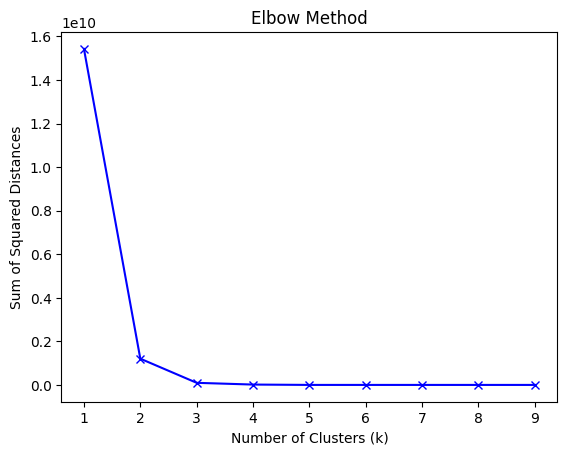

In [59]:
from sklearn.cluster import KMeans
k_values = range(1, 10)
X = mmm[features].values


inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()
# по графику видно, что лучше брать k = 2

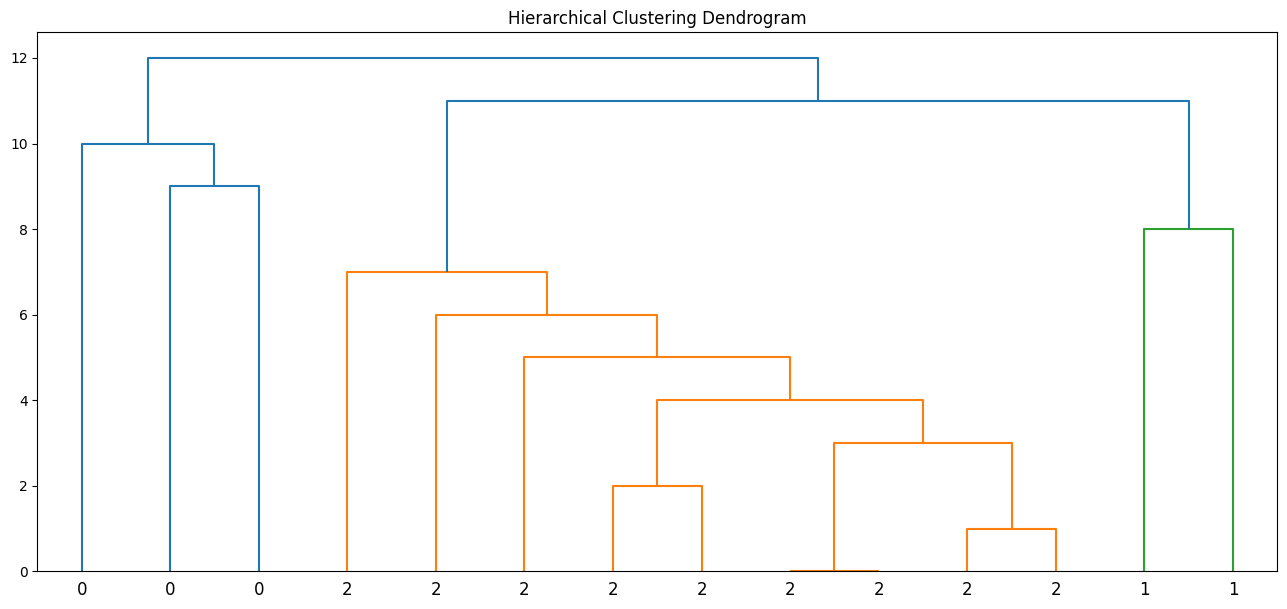

In [60]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):


    children = model.children_


    distance = np.arange(children.shape[0])


    no_of_observations = np.arange(2, children.shape[0]+2)

    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = mmm[features].values
model = AgglomerativeClustering(n_clusters=3)

model = model.fit(X)
plt.figure(figsize=(16,7))
plot_dendrogram(model, labels=model.labels_)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [47]:
mmm.columns

Index(['Код станции отправления', 'Станция отправления ', 'Регион отгрузки ',
       'Ж/Д отгрузки ', 'Отд. ж/д отгрузки ', 'Код станции назначения',
       'Станция назначения ', 'Регион поставки ', 'Ж/Д поставки ',
       'Отд. ж/д поставки ', 'Код Клиента ', 'Клиент ',
       'Код отправителя груза', 'ОКПО отправителя', 'Отправитель',
       'ФИО Руководителя Отправителя', 'Почтовый индекс Отправителя',
       'Адрес Отправителя', 'Тел. Отправителя', 'E-mail Отправителя',
       'Факс Отправителя', 'Код получателя груза ', 'ОКПО получателя',
       'Получатель', 'ФИО Руководителя получателя',
       'Почтовый индекс получателя', 'Адрес получателя', 'Тел. получателя',
       'E-mail Получателя', 'Факс получателя', 'Код груза ',
       'Наименование груза ', 'Вес груза, тонн ', 'Количество вагонов ',
       'Тонно-километры', 'Дата отгрузки ', 'Дата прибытия ',
       'Характер перевозок', 'Станция отправления загран',
       'Код станции отправления загран', 'Станция назначения загра

<AxesSubplot: >

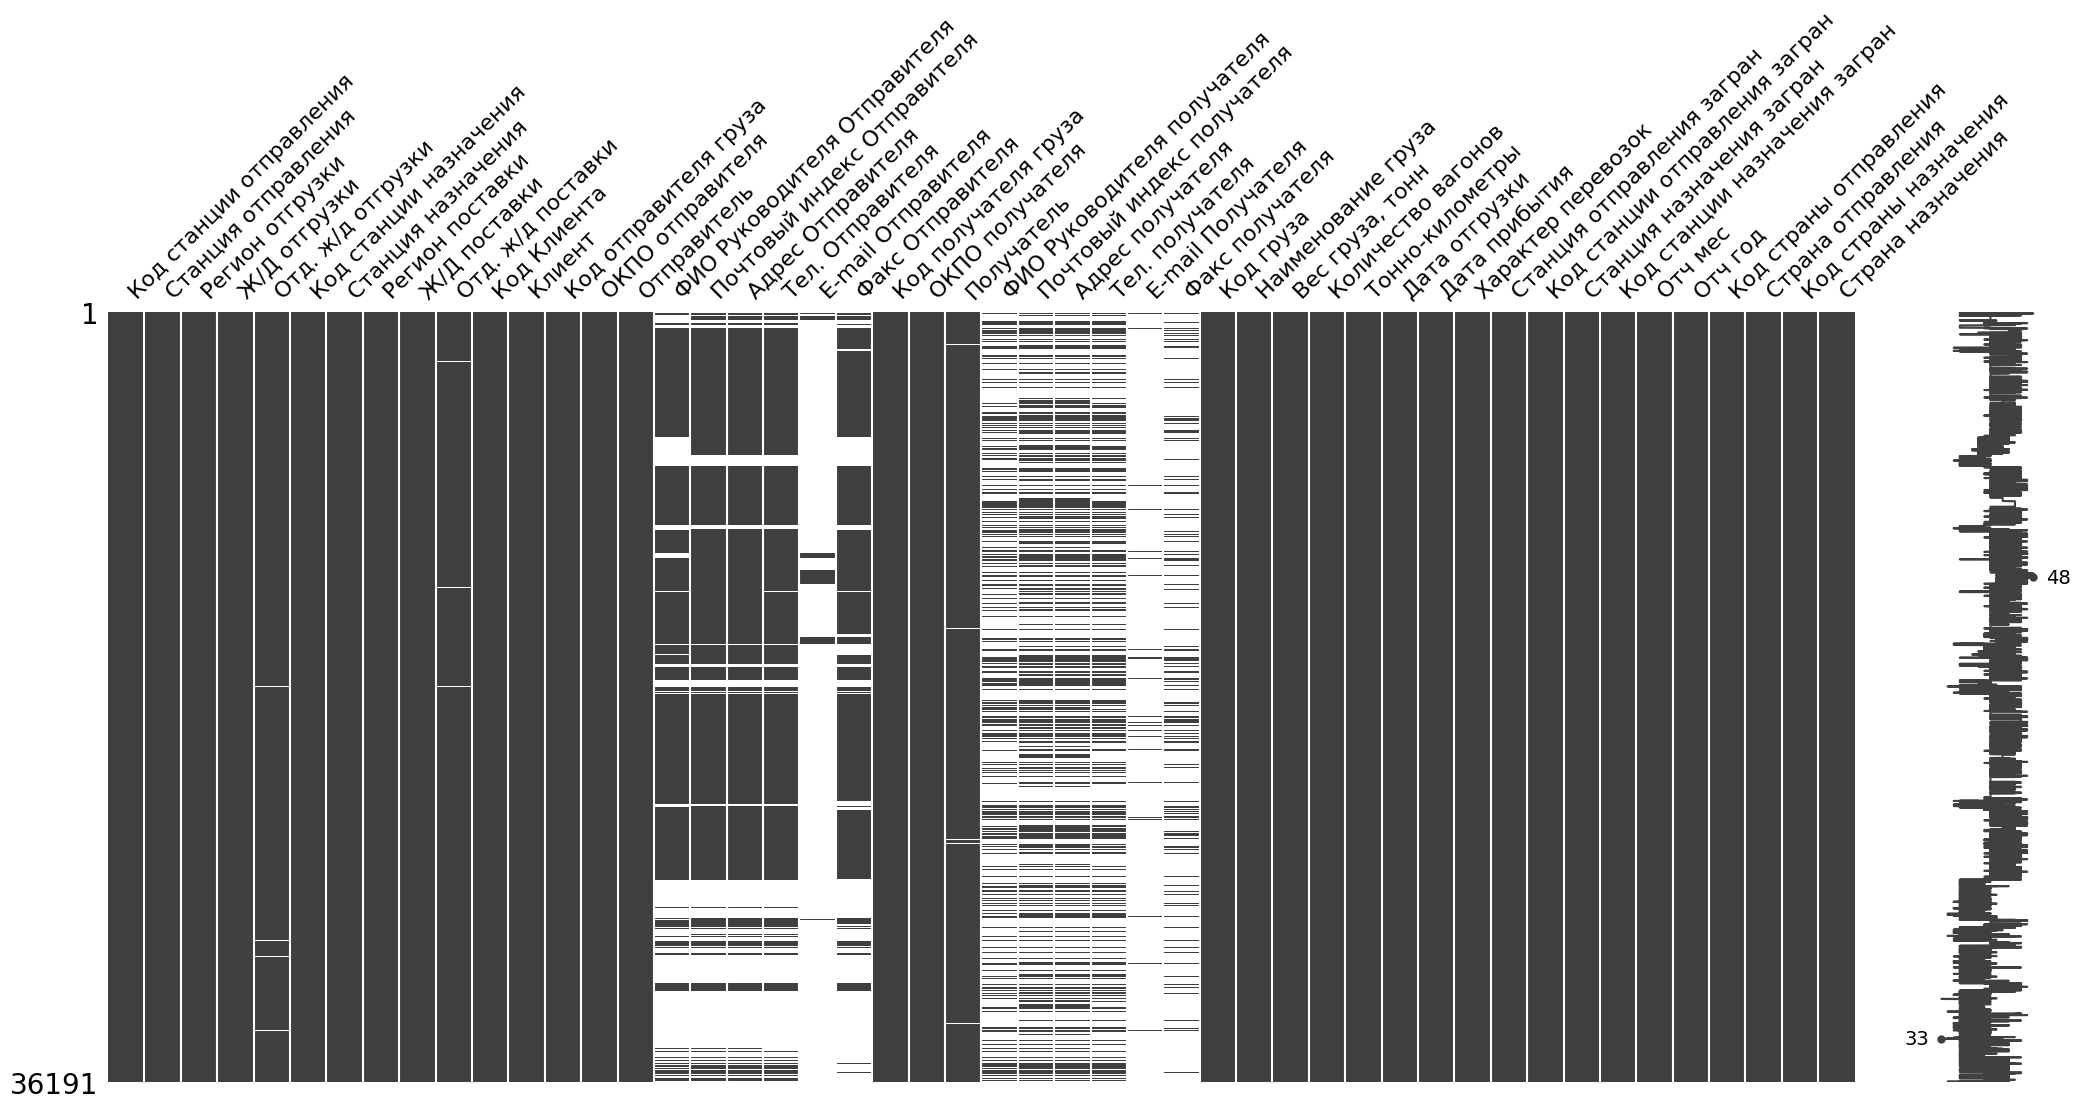

In [53]:
msn.matrix(data_copy)
#построил матрицу Null значений

In [161]:
df = data_copy.copy()
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format='%d%m')
df['Дата прибытия'] = pd.to_datetime(df['Дата прибытия'], format='%d%m')

# Вычиcляем разницу и преобразуйте в дни
df['Разница в днях'] = (df['Дата прибытия'] - df['Дата отгрузки']).dt.days

# Выведем результат
print(df.head())

   Код станции отправления   Станция отправления      Регион отгрузки  \
0                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
1                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
2                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   
4                    86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ  КЕМЕРОВСКАЯ ОБЛАСТЬ   

        Ж/Д отгрузки Отд. ж/д отгрузки  Код станции назначения  \
0  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
1  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
2  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
3  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
4  Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   

        Станция назначения Регион поставки       Ж/Д поставки  \
0  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙСКИЙ КРАЙ  Западно-Сибирская   
1  КУЛУНДА-ЭКСПОРТ (В КАЗ)  АЛТАЙС

In [ ]:
df.describe()

In [162]:
df['Разница в днях'] = df['Разница в днях'].apply(abs)
df['Вес груза, тонн'] = df['Вес груза, тонн'].apply(abs)
df['Dostavka_3_day'] = df.apply(lambda row: 1 if row['Разница в днях'] >3 else 0 , axis = 1)


In [163]:
for column in df.columns:
    nan_count = df[column].isnull().sum()
    total_count = len(df[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам  

Процент NaN значений в столбце Код станции отправления равен 0.0%
Процент NaN значений в столбце Станция отправления равен 0.0027631179022408886%
Процент NaN значений в столбце Регион отгрузки равен 0.0027631179022408886%
Процент NaN значений в столбце Ж/Д отгрузки равен 0.0027631179022408886%
Процент NaN значений в столбце Отд. ж/д отгрузки равен 0.29841673344201597%
Процент NaN значений в столбце Код станции назначения равен 0.0%
Процент NaN значений в столбце Станция назначения равен 0.0027631179022408886%
Процент NaN значений в столбце Регион поставки равен 0.0027631179022408886%
Процент NaN значений в столбце Ж/Д поставки равен 0.0027631179022408886%
Процент NaN значений в столбце Отд. ж/д поставки равен 0.696305711364704%
Процент NaN значений в столбце Код Клиента равен 0.0%
Процент NaN значений в столбце Клиент равен 0.0%
Процент NaN значений в столбце Код отправителя груза равен 0.0%
Процент NaN значений в столбце ОКПО отправителя равен 0.0%
Процент NaN значений в столбце Отпра

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36193 entries, 0 to 36192
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Код станции отправления         36193 non-null  int64         
 1   Станция отправления             36192 non-null  object        
 2   Регион отгрузки                 36192 non-null  object        
 3   Ж/Д отгрузки                    36192 non-null  object        
 4   Отд. ж/д отгрузки               36085 non-null  object        
 5   Код станции назначения          36193 non-null  int64         
 6   Станция назначения              36192 non-null  object        
 7   Регион поставки                 36192 non-null  object        
 8   Ж/Д поставки                    36192 non-null  object        
 9   Отд. ж/д поставки               35941 non-null  object        
 10  Код Клиента                     36193 non-null  int64         
 11  Кл

In [164]:
df = df[df['Регион поставки'] != 'ГОРОД МОСКВА СТОЛИЦА РФ']
df = df[df['Регион поставки'] != 'МОСКОВСКАЯ ОБЛАСТЬ']
df = df[df['Регион поставки'] != 'ГОРОД САНКТ-ПЕТЕРБУРГ']
# отсортировал реигон поставки по условию
df

Код станции отправления   Станция отправления          Регион отгрузки  \
0                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
1                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
2                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
4                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
...                        ...                   ...                      ...   
36188                    93460               МЫСОВАЯ       РЕСПУБЛИКА БУРЯТИЯ   
36189                    93460               МЫСОВАЯ       РЕСПУБЛИКА БУРЯТИЯ   
36190                    94960                ЗИЛОВО        ЧИТИНСКАЯ ОБЛАСТЬ   
36191                    65540                ИГЛИНО  РЕСПУБЛИКА БАШКОРТОСТАН   
36192                    65540                ИГЛИНО  РЕСПУБЛИКА БАШКОРТОСТАН   

             Ж/Д отгрузки Отд. ж/д отгрузки  Код станции назначения  \
0       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
1       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
2       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
3       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
4       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
...                   ...               ...                     ...   
36188  Восточно-Сибирская      УЛАH-УДЕH-ОЕ                   93320   
36189  Восточно-Сибирская      УЛАH-УДЕH-ОЕ                   93460   
36190       Забайкальская       МОГОЧИHСКОЕ                   95050   
36191        Куйбышевская        БАШКИРСКОЕ                   65540   
36192        Куйбышевская        БАШКИРСКОЕ                   65700   

            Станция назначения          Регион поставки        Ж/Д поставки  \
0      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
1      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
2      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
3      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
4      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
...                        ...                      ...                 ...   
36188                АНГАСОЛКА        ИРКУТСКАЯ ОБЛАСТЬ  Восточно-Сибирская   
36189                  МЫСОВАЯ       РЕСПУБЛИКА БУРЯТИЯ  Восточно-Сибирская   
36190                    СБЕГА        ЧИТИНСКАЯ ОБЛАСТЬ       Забайкальская   
36191                   ИГЛИНО  РЕСПУБЛИКА БАШКОРТОСТАН        Куйбышевская   
36192                   РАЕВКА  РЕСПУБЛИКА БАШКОРТОСТАН        Куйбышевская   

      Отд. ж/д поставки  ...  Станция назначения загран  \
0             АЛТАЙСКОЕ  ...                   БИШКЕК 1   
1             АЛТАЙСКОЕ  ...                   БИШКЕК 1   
2             АЛТАЙСКОЕ  ...                   БИШКЕК 1   
3             АЛТАЙСКОЕ  ...                    АКЖАЙЫК   
4             АЛТАЙСКОЕ  ...                    АКЖАЙЫК   
...                 ...  ...                        ...   
36188      УЛАH-УДЕH-ОЕ  ...                      00000   
36189      УЛАH-УДЕH-ОЕ  ...                      00000   
36190       МОГОЧИHСКОЕ  ...                      00000   
36191        БАШКИРСКОЕ  ...                      00000   
36192        БАШКИРСКОЕ  ...                      00000   

      Код станции назначения загран  Отч мес  Отч год Код страны отправления  \
0                             71660        5       19                    643   
1                             71660        5       19                    643   
2                             71660        5       19                    643   
3                             66160        5       19                    643   
4                             66160        5       19                    643   
...                             ...      ..

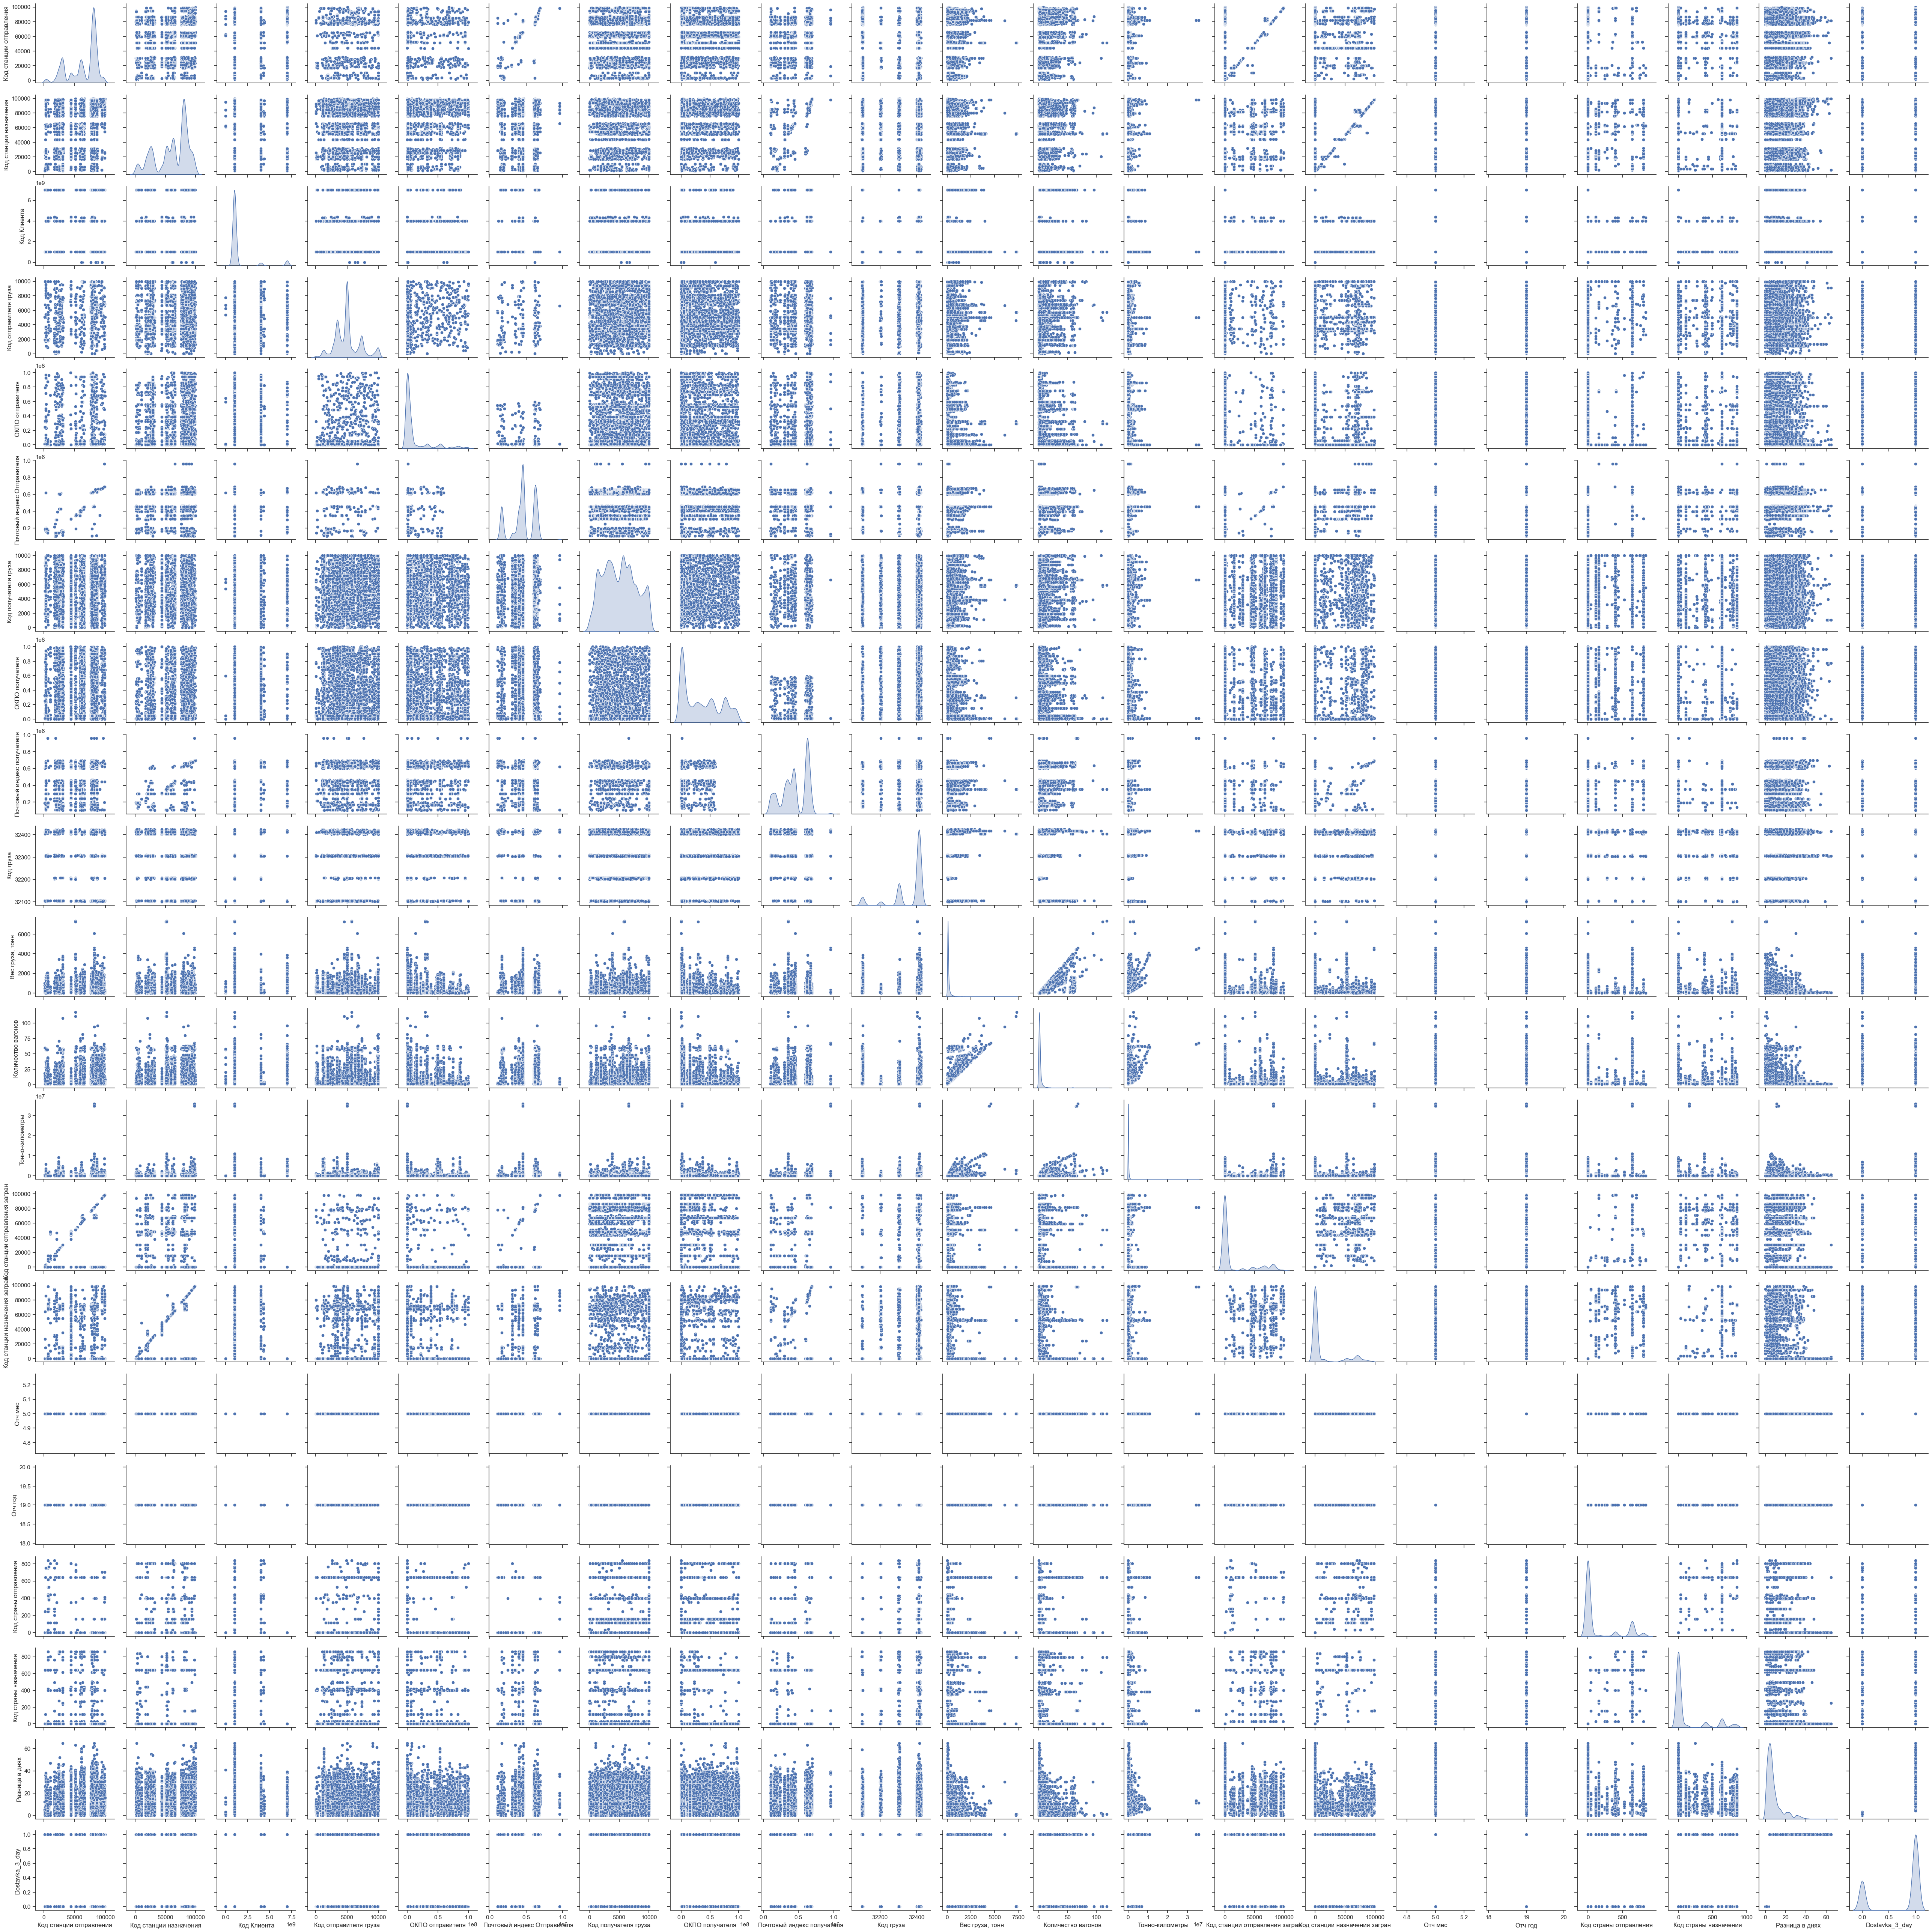

In [184]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind='kde')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30428 entries, 0 to 36192
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Код станции отправления         30428 non-null  int64         
 1   Станция отправления             30427 non-null  object        
 2   Регион отгрузки                 30427 non-null  object        
 3   Ж/Д отгрузки                    30427 non-null  object        
 4   Отд. ж/д отгрузки               30320 non-null  object        
 5   Код станции назначения          30428 non-null  int64         
 6   Станция назначения              30427 non-null  object        
 7   Регион поставки                 30427 non-null  object        
 8   Ж/Д поставки                    30427 non-null  object        
 9   Отд. ж/д поставки               30176 non-null  object        
 10  Код Клиента                     30428 non-null  int64         
 11  Кл

In [165]:

train_copy = df.copy()
drop_col = []
for i in train_copy.columns:
    if 'Код' in i:
        drop_col.append(i)

train_copy

Код станции отправления   Станция отправления          Регион отгрузки  \
0                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
1                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
2                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
3                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
4                        86420  НОВОКУЗНЕЦК-СЕВЕРНЫЙ      КЕМЕРОВСКАЯ ОБЛАСТЬ   
...                        ...                   ...                      ...   
36188                    93460               МЫСОВАЯ       РЕСПУБЛИКА БУРЯТИЯ   
36189                    93460               МЫСОВАЯ       РЕСПУБЛИКА БУРЯТИЯ   
36190                    94960                ЗИЛОВО        ЧИТИНСКАЯ ОБЛАСТЬ   
36191                    65540                ИГЛИНО  РЕСПУБЛИКА БАШКОРТОСТАН   
36192                    65540                ИГЛИНО  РЕСПУБЛИКА БАШКОРТОСТАН   

             Ж/Д отгрузки Отд. ж/д отгрузки  Код станции назначения  \
0       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
1       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
2       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
3       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
4       Западно-Сибирская      HОВОКУЗHЕЦ-Е                   84480   
...                   ...               ...                     ...   
36188  Восточно-Сибирская      УЛАH-УДЕH-ОЕ                   93320   
36189  Восточно-Сибирская      УЛАH-УДЕH-ОЕ                   93460   
36190       Забайкальская       МОГОЧИHСКОЕ                   95050   
36191        Куйбышевская        БАШКИРСКОЕ                   65540   
36192        Куйбышевская        БАШКИРСКОЕ                   65700   

            Станция назначения          Регион поставки        Ж/Д поставки  \
0      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
1      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
2      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
3      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
4      КУЛУНДА-ЭКСПОРТ (В КАЗ)           АЛТАЙСКИЙ КРАЙ   Западно-Сибирская   
...                        ...                      ...                 ...   
36188                АНГАСОЛКА        ИРКУТСКАЯ ОБЛАСТЬ  Восточно-Сибирская   
36189                  МЫСОВАЯ       РЕСПУБЛИКА БУРЯТИЯ  Восточно-Сибирская   
36190                    СБЕГА        ЧИТИНСКАЯ ОБЛАСТЬ       Забайкальская   
36191                   ИГЛИНО  РЕСПУБЛИКА БАШКОРТОСТАН        Куйбышевская   
36192                   РАЕВКА  РЕСПУБЛИКА БАШКОРТОСТАН        Куйбышевская   

      Отд. ж/д поставки  ...  Станция назначения загран  \
0             АЛТАЙСКОЕ  ...                   БИШКЕК 1   
1             АЛТАЙСКОЕ  ...                   БИШКЕК 1   
2             АЛТАЙСКОЕ  ...                   БИШКЕК 1   
3             АЛТАЙСКОЕ  ...                    АКЖАЙЫК   
4             АЛТАЙСКОЕ  ...                    АКЖАЙЫК   
...                 ...  ...                        ...   
36188      УЛАH-УДЕH-ОЕ  ...                      00000   
36189      УЛАH-УДЕH-ОЕ  ...                      00000   
36190       МОГОЧИHСКОЕ  ...                      00000   
36191        БАШКИРСКОЕ  ...                      00000   
36192        БАШКИРСКОЕ  ...                      00000   

      Код станции назначения загран  Отч мес  Отч год Код страны отправления  \
0                             71660        5       19                    643   
1                             71660        5       19                    643   
2                             71660        5       19                    643   
3                             66160        5       19                    643   
4                             66160        5       19                    643   
...                             ...      ..

In [166]:
train_copy = train_copy.drop(drop_col,axis = 1)
train_copy_enc = train_copy.drop(['ФИО Руководителя получателя','Адрес получателя','Почтовый индекс получателя','Тел. получателя','E-mail Получателя','Факс получателя','Отправитель', 'ФИО Руководителя Отправителя',
       'Почтовый индекс Отправителя', 'Адрес Отправителя', 'Тел. Отправителя',
       'E-mail Отправителя', 'Факс Отправителя', 'ОКПО получателя',
       'Получатель','Дата отгрузки', 'Дата прибытия'],axis = 1)


In [167]:
train_copy_enc.columns

Index(['Станция отправления', 'Регион отгрузки', 'Ж/Д отгрузки',
       'Отд. ж/д отгрузки', 'Станция назначения', 'Регион поставки',
       'Ж/Д поставки', 'Отд. ж/д поставки', 'Клиент', 'ОКПО отправителя',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Характер перевозок', 'Станция отправления загран',
       'Станция назначения загран', 'Отч мес', 'Отч год', 'Страна отправления',
       'Страна назначения', 'Разница в днях', 'Dostavka_3_day'],
      dtype='object')

<AxesSubplot: >

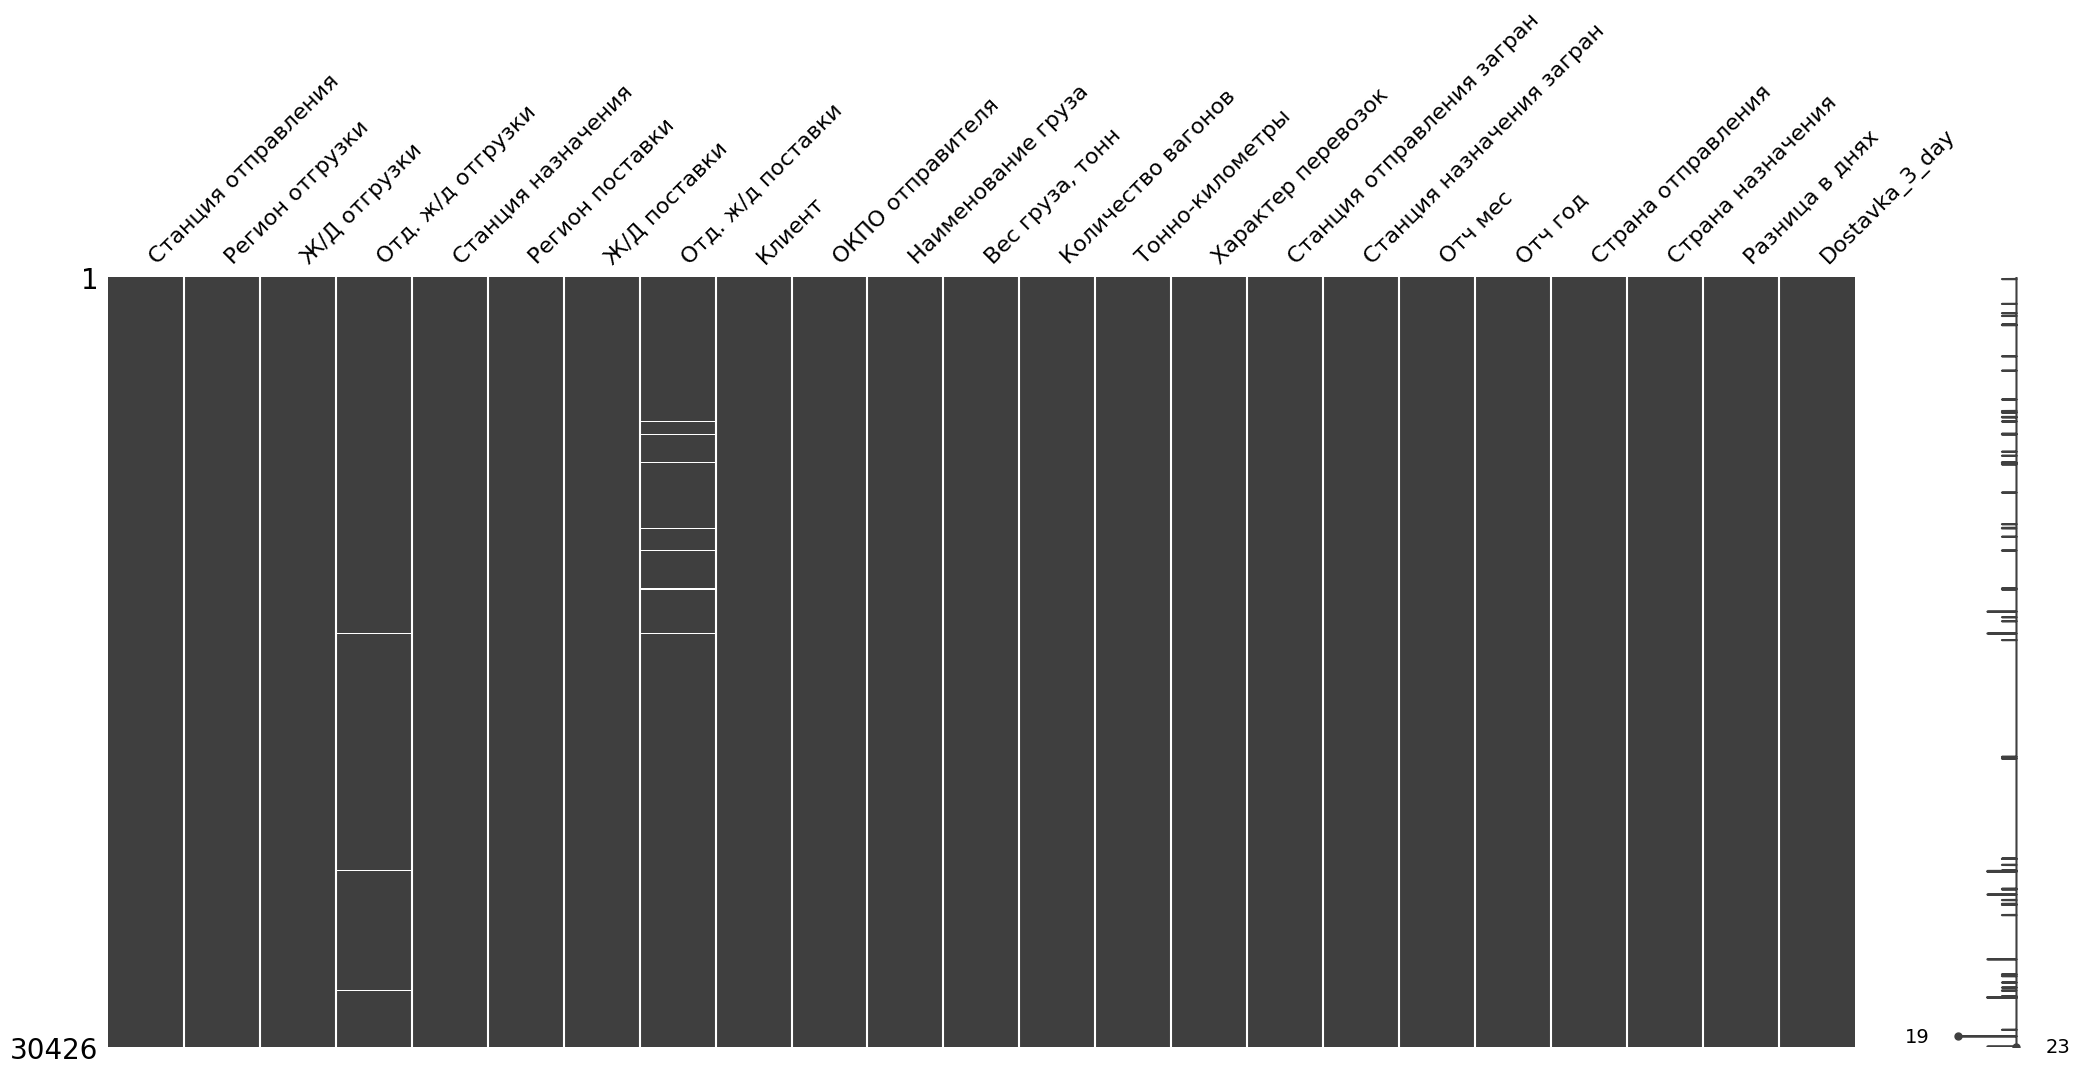

In [168]:
msn.matrix(train_copy_enc)
#построил матрицу Null значений. После отсеивания столбцов не влияющих на целевую переменную, остались столбцы с небольшим количеством пустых значений
#null значения будут заменены на моду 

In [173]:
train_copy_enc['Отд. ж/д поставки'] = train_copy_enc['Отд. ж/д поставки'].fillna(train_copy_enc['Отд. ж/д поставки'].mode())
train_copy_enc['Отд. ж/д отгрузки'] = train_copy_enc['Отд. ж/д отгрузки'].fillna(train_copy_enc['Отд. ж/д поставки'].mode())

In [25]:
train_copy_enc.describe()

Код станции отправления  Код станции назначения  Код Клиента   \
count             30428.000000            30428.000000  3.042800e+04   
mean              63831.836795            61679.663797  1.489743e+09   
std               23697.413384            26290.311003  1.531529e+09   
min                1300.000000             1000.000000  0.000000e+00   
25%               43970.000000            43970.000000  1.000234e+09   
50%               78020.000000            65430.000000  1.001351e+09   
75%               81760.000000            81450.000000  1.003305e+09   
max               99630.000000            99810.000000  7.000118e+09   

       Код отправителя груза  ОКПО отправителя  Код получателя груза   \
count           30428.000000      3.042800e+04           30428.000000   
mean             5034.674576      1.191130e+07            5073.216938   
std              1977.809151      2.291690e+07            2695.150612   
min                35.000000      0.000000e+00              12.000000   
25%              3438.000000      1.864240e+05            2895.000000   
50%              5010.000000      1.866310e+05            5084.000000   
75%              5865.000000      5.757848e+06            7095.000000   
max              9999.000000      9.995542e+07            9999.000000   

         Код груза   Вес груза, тонн   Количество вагонов   Тонно-километры  \
count  30428.000000      30428.000000         30428.000000     3.042800e+04   
mean   32363.026259        161.666091             3.506934     2.005449e+05   
std       90.100251        299.673886             8.186671     5.966056e+05   
min    32101.000000          0.000000             0.000000     0.000000e+00   
25%    32307.000000         63.870000             1.000000     4.899900e+04   
50%    32411.000000         67.930000             1.000000     1.042265e+05   
75%    32416.000000        134.440250             2.000000     1.926695e+05   
max    32423.000000       7344.600000           118.000000     3.580672e+07   

       Код станции отправления загран  Код станции назначения загран  Отч мес  \
count                    30428.000000                   30428.000000  30428.0   
mean                     15522.338635                   14205.755883      5.0   
std                      29065.670607                   27495.158351      0.0   
min                          0.000000                       0.000000      5.0   
25%                          0.000000                       0.000000      5.0   
50%                          0.000000                       0.000000      5.0   
75%                          0.000000                       0.000000      5.0   
max                      98610.000000                   98610.000000      5.0   

       Отч год  Код страны отправления  Код страны назначения  \
count  30428.0            30428.000000           30428.000000   
mean      19.0              143.732615             131.693144   
std        0.0              264.782363             258.487066   
min       19.0                0.000000               0.000000   
25%       19.0                0.000000               0.000000   
50%       19.0                0.000000               0.000000   
75%       19.0                0.000000               0.000000   
max       19.0              840.000000             860.000000   

       Разница в днях   Dostavka_3_day  
count     30428.000000    30428.000000  
mean          6.185454        0.663106  
std           9.162093        0.472656  
min         -26.000000        0.000000  
25%           3.000000        0.000000  
50%           5.000000        1.000000  
75%           8.000000        1.000000  
max          65.000000        1.000000

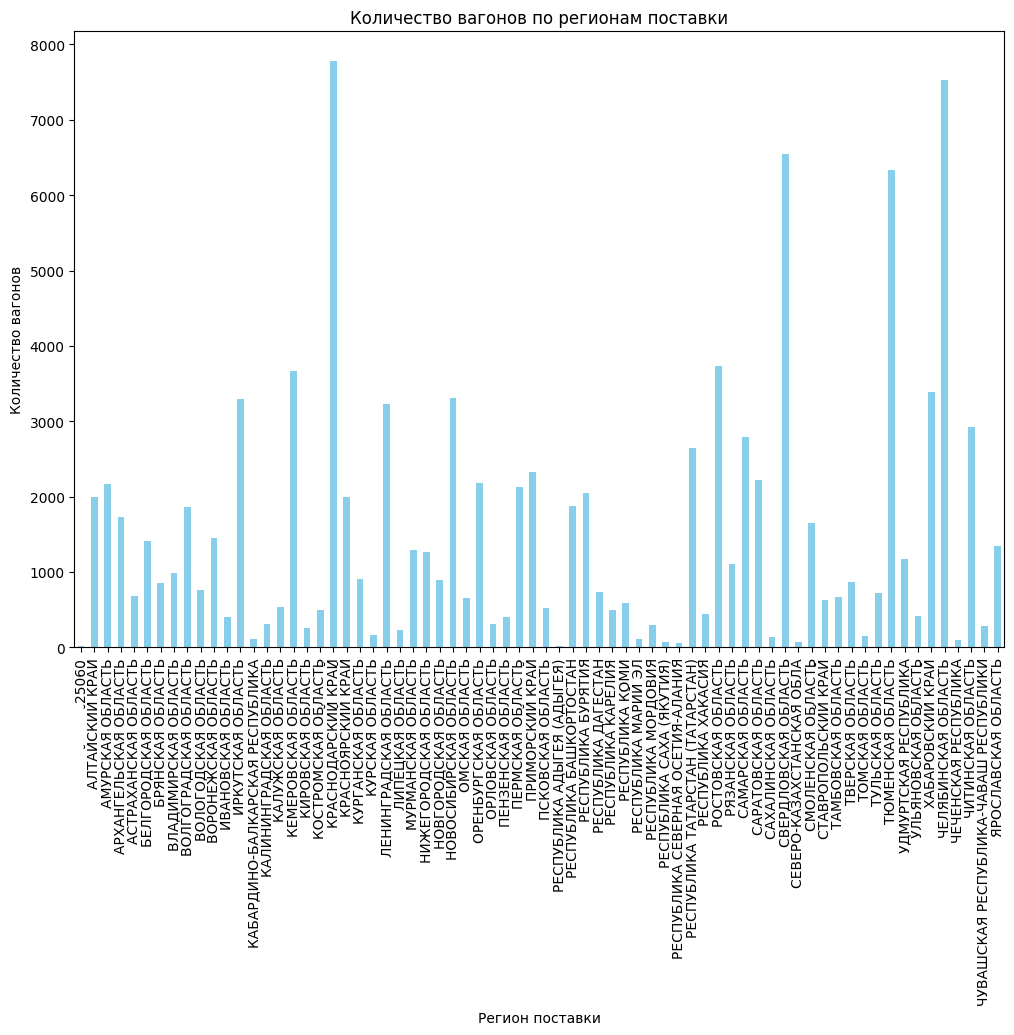

In [174]:
grouped_data = train_copy_enc.groupby('Регион поставки')['Количество вагонов'].sum()

# Создание графика
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Количество вагонов по регионам поставки')
plt.xlabel('Регион поставки')
plt.ylabel('Количество вагонов')
plt.show()

<Figure size 1200x600 with 0 Axes>

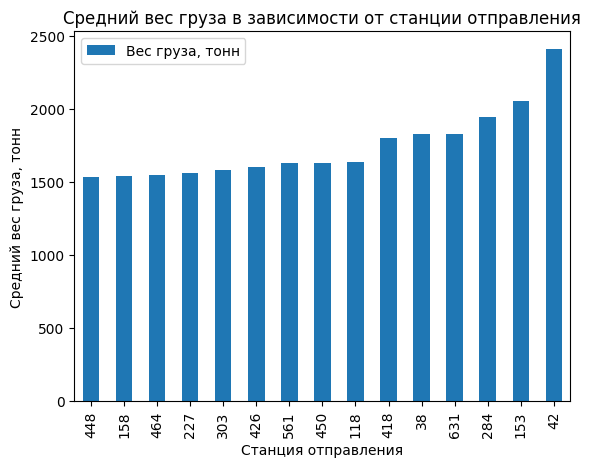

In [79]:


# Группируем данные по станции отправления и вычисляем средний вес груза
average_weight_by_station = train_copy_enc.groupby('Станция отправления')['Вес груза, тонн'].mean().reset_index(name='Вес груза, тонн')

average_weight_by_station = average_weight_by_station.sort_values(by = 'Вес груза, тонн').tail(15)


# Строим график
plt.figure(figsize=(12, 6))
average_weight_by_station.plot(kind='bar')
plt.title('Средний вес груза в зависимости от станции отправления')
plt.xlabel('Станция отправления')
plt.ylabel('Средний вес груза, тонн')
plt.show()


dict_keys([0, 1, 2, 3])


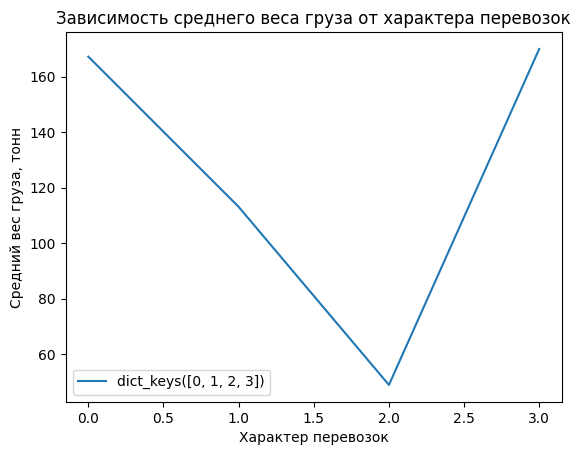

In [153]:
data = train_copy_enc.copy()[['Наименование груза', 'Характер перевозок','Вес груза, тонн']]

#Группировка данных по характеру перевозок
grouped = data.groupby('Характер перевозок')

#Вычисление среднего веса груза для каждого характера перевозок
means = grouped.mean()['Вес груза, тонн']

#Создание списка характеров перевозок
characters = grouped.groups.keys()
print(characters)
#Преобразование списка характеров перевозок в строку для использования в качестве подписей на оси x графика
characters = ', '.join(characters)

#Построение графика
plt.figure()
plt.plot(means, label=characters)
plt.xlabel('Характер перевозок')
plt.ylabel('Средний вес груза, тонн')
plt.title('Зависимость среднего веса груза от характера перевозок')
plt.legend()
plt.show()

In [175]:
label_endcoder = LabelEncoder()


for i in train_copy_enc.columns:
    
    if i not in  ['Dostavka_3_day','Разница в днях','Тонно-километры','Вес груза, тонн']: 
        train_copy_enc[i] = label_endcoder.fit_transform(train_copy_enc[i])
train_copy_enc

Станция отправления  Регион отгрузки  Ж/Д отгрузки  Отд. ж/д отгрузки  \
0                      353               18             5                  1   
1                      353               18             5                  1   
2                      353               18             5                  1   
3                      353               18             5                  1   
4                      353               18             5                  1   
...                    ...              ...           ...                ...   
36188                  334               40             0                 95   
36189                  334               40             0                 95   
36190                  164               65             4                 52   
36191                  172               39             8                  9   
36192                  172               39             8                  9   

       Станция назначения  Регион поставки  Ж/Д поставки  Отд. ж/д поставки  \
0                     470                1             5                  4   
1                     470                1             5                  4   
2                     470                1             5                  4   
3                     470                1             5                  4   
4                     470                1             5                  4   
...                   ...              ...           ...                ...   
36188                  20               12             0                 94   
36189                 595               38             0                 94   
36190                 826               67             4                 54   
36191                 306               37             8                  9   
36192                 780               37             8                  9   

       Клиент  ОКПО отправителя  ...  Тонно-километры  Характер перевозок  \
0         159               143  ...            45536                   3   
1         159               143  ...            45684                   3   
2         159               143  ...           179112                   3   
3         159               143  ...            45014                   3   
4         159               143  ...            45576                   3   
...       ...               ...  ...              ...                 ...   
36188     424               374  ...           102306                   0   
36189     424               374  ...                0                   0   
36190     418                46  ...             2718                   0   
36191      12               379  ...                0                   0   
36192      12               379  ...            30442                   0   

       Станция отправления загран  Станция назначения загран  Отч мес  \
0                              72                         59        0   
1                              72                         59        0   
2                              72                         59        0   
3                              72                          4        0   
4                              72                          4        0   
...                           ...                        ...      ...   
36188                           0                          0        0   
36189                           0                          0        0   
36190                           0                          0        0   
36191                           0                          0        0   
36192                           0                          0        0   

       Отч год  Страна отправления  Страна назначения  Разница в днях  \
0            0                  17                 18               1   
1            0                  17                 18               2   
2            0                  17                 18              10   
3  

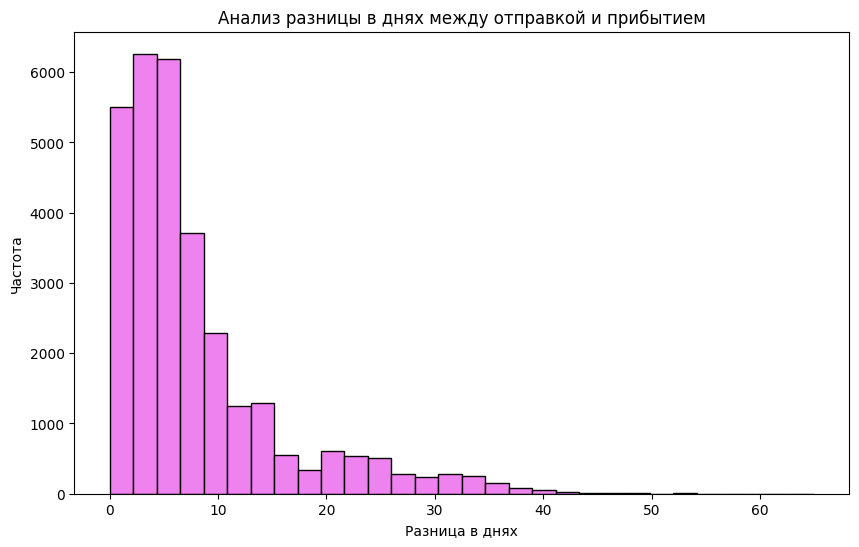

In [146]:
plt.figure(figsize=(10, 6))
plt.hist(train_copy_enc['Разница в днях'], bins=30, color='violet', edgecolor='black')
plt.title('Анализ разницы в днях между отправкой и прибытием')
plt.xlabel('Разница в днях')
plt.ylabel('Частота')
plt.show()

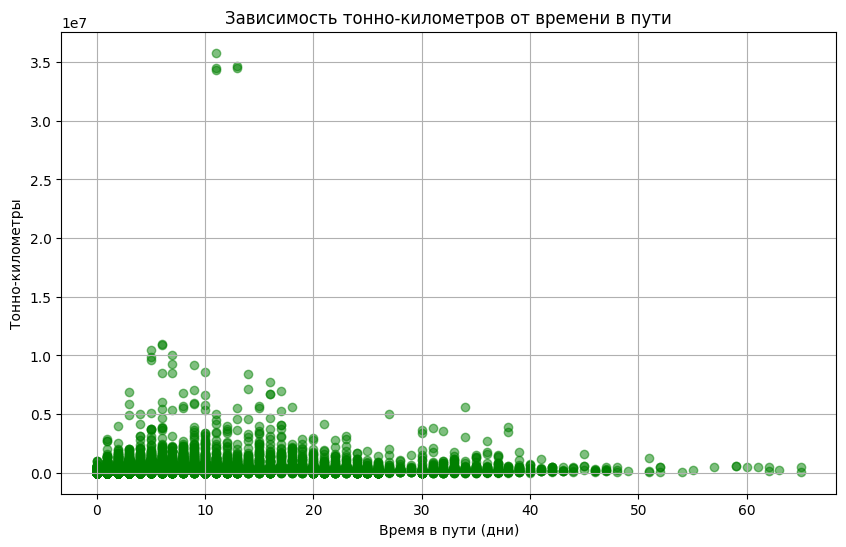

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(train_copy_enc['Разница в днях'], train_copy_enc['Тонно-километры'], alpha=0.5, c = 'g')
plt.title('Зависимость тонно-километров от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Тонно-километры')
plt.grid(True)
plt.show()

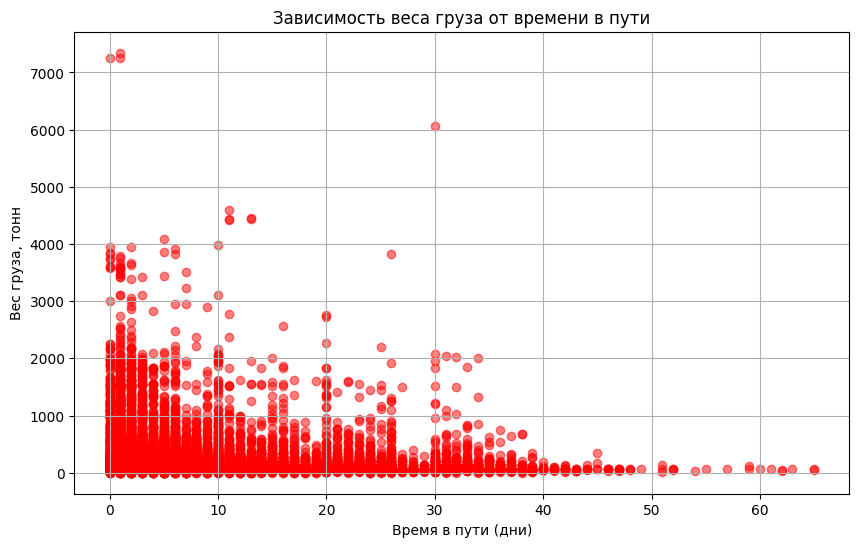

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(train_copy_enc['Разница в днях'], train_copy_enc['Вес груза, тонн'], alpha=0.5, c='#FF0000')
plt.title('Зависимость веса груза от времени в пути')
plt.xlabel('Время в пути (дни)')
plt.ylabel('Вес груза, тонн')
plt.grid(True)
plt.show()

In [176]:

X = train_copy_enc.drop(['Dostavka_3_day','Разница в днях'],axis = 1)
y = train_copy_enc['Dostavka_3_day']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

In [177]:


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


classification_report_output = classification_report(y_test, y_pred)
classification_report_output

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'              precision    recall  f1-score   support\n\n           0       0.81      0.33      0.47      1707\n           1       0.79      0.97      0.87      4379\n\n    accuracy                           0.79      6086\n   macro avg       0.80      0.65      0.67      6086\nweighted avg       0.80      0.79      0.76      6086\n'

In [178]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7913243509694381

In [179]:
train_copy_enc.columns

Index(['Станция отправления', 'Регион отгрузки', 'Ж/Д отгрузки',
       'Отд. ж/д отгрузки', 'Станция назначения', 'Регион поставки',
       'Ж/Д поставки', 'Отд. ж/д поставки', 'Клиент', 'ОКПО отправителя',
       'Наименование груза', 'Вес груза, тонн', 'Количество вагонов',
       'Тонно-километры', 'Характер перевозок', 'Станция отправления загран',
       'Станция назначения загран', 'Отч мес', 'Отч год', 'Страна отправления',
       'Страна назначения', 'Разница в днях', 'Dostavka_3_day'],
      dtype='object')

In [180]:
# обучение модели на


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import mean_absolute_error, r2_score

# Создайте модель градиентного бустинга
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8466973381531383

In [181]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

print("Точность модели на обучающей выборке: ", clf.score(X_train, y_train))

Точность модели на обучающей выборке:  0.8187756778964668


In [34]:
from tpot import TPOTClassifier

from sklearn.model_selection import train_test_split




tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.3, min_samples_leaf=2, min_samples_split=17, n_estimators=100)
0.8391390075583306


In [182]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(f"Точность модели на тестовой выборке: {(predictions == y_test).mean()}")

Точность модели на тестовой выборке: 0.7371015445284259


In [183]:
# модель метод опорных векторов
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)

print('Точность модели:', clf.score(X, y))

Точность модели: 0.7204364688095708


In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    scoring='accuracy',
    cv=cv,
    verbosity=2,
    random_state=1,
    n_jobs=-1
)

In [36]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8412073764494215

Generation 2 - Current best internal CV score: 0.8412073764494215

Generation 3 - Current best internal CV score: 0.8412073764494215

Generation 4 - Current best internal CV score: 0.8412073764494215

Generation 5 - Current best internal CV score: 0.8412073764494215

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.45, min_samples_leaf=3, min_samples_split=13, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [99]:
from sklearn.ensemble import ExtraTreesClassifier
best_model = ExtraTreesClassifier( bootstrap=False, max_features=0.45, min_samples_leaf=3, min_samples_split=13, n_estimators=100)
best_model.fit(X_train, y_train)
# make predictions
preds = best_model.predict(X_test)
best_model.score(X_test, y_test)

0.8706868222149194

In [100]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)
bst.score(X_test, y_test)

0.8011830430496221

In [139]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

model = CatBoostClassifier(loss_function='Logloss', iterations=1600, learning_rate=0.09, depth=4)

model.fit(X_train, y_train, verbose=100)

# Получаем предсказания для тестовых данных
y_pred = model.predict(X_test)

# Рассчитываем точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

0:	learn: 0.6502610	total: 5.48ms	remaining: 8.76s
100:	learn: 0.3532246	total: 505ms	remaining: 7.5s
200:	learn: 0.3270595	total: 982ms	remaining: 6.83s
300:	learn: 0.3121799	total: 1.46s	remaining: 6.29s
400:	learn: 0.3022839	total: 1.93s	remaining: 5.77s
500:	learn: 0.2932001	total: 2.38s	remaining: 5.23s
600:	learn: 0.2863013	total: 2.87s	remaining: 4.77s
700:	learn: 0.2801272	total: 3.31s	remaining: 4.25s
800:	learn: 0.2746408	total: 3.73s	remaining: 3.72s
900:	learn: 0.2694480	total: 4.21s	remaining: 3.27s
1000:	learn: 0.2650853	total: 4.64s	remaining: 2.77s
1100:	learn: 0.2608506	total: 5.08s	remaining: 2.3s
1200:	learn: 0.2567921	total: 5.5s	remaining: 1.83s
1300:	learn: 0.2531621	total: 5.98s	remaining: 1.37s
1400:	learn: 0.2496900	total: 6.42s	remaining: 912ms
1500:	learn: 0.2464112	total: 6.85s	remaining: 452ms
1599:	learn: 0.2433850	total: 7.27s	remaining: 0us
Accuracy: 0.8718370029576076


In [140]:
import shap
explainer_your_model = shap.Explainer(model)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(bst)
shap_values_tpot = explainer_tpot.shap_values(X_test)

[23:12:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


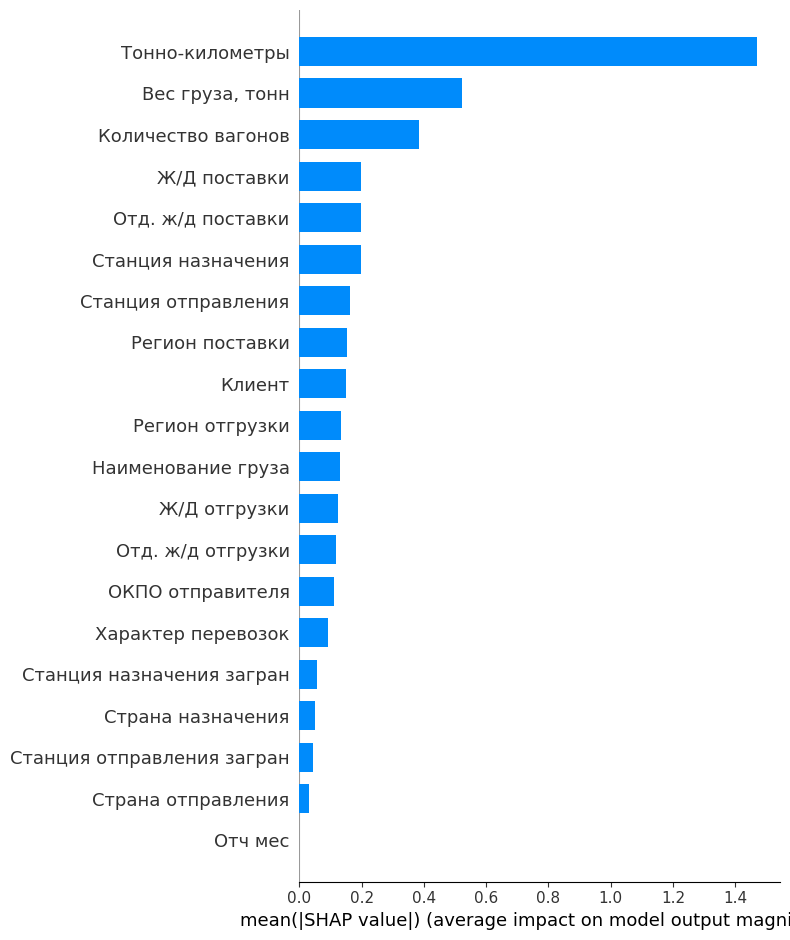

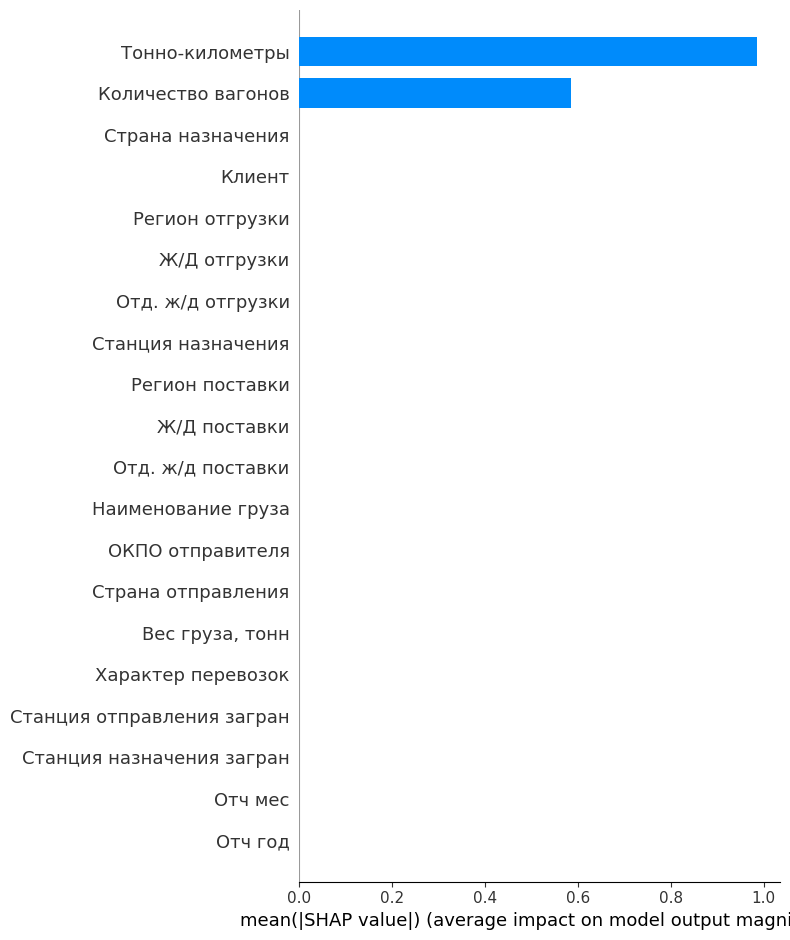

In [141]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, plot_type="bar")